Image compression. A digital image can be represented with a matrix, where each element of the matrix represents a pixel in the image. A low-rank approximation to the matrix is one way to compress the image, as explored in this problem. A data file contains a matrix A ∈ R600×400 of grayscale values scaled to lie between 0 and 1. A helper script loads the data and displays the corresponding image. There are three lines of code that require completion before you can run the code: one in the section labeled “Bucky’s Singular Values” and two in the section labeled “Low-Rank Approximation”.

a) 
Take the SVD of A by completing the code. Inspect the singular value spectrum. What do you conclude about the approximate rank of A? Why is it useful to plot the logarithm of the singular values?

b) 
Approximate A as a rank r matrix Ar by only keeping the r largest singular values and making the rest zero. Try this for r ∈ {10,20,50,100} and plot the corresponding low-rank images. Also find the fractional squared error
$$
e = \frac{||A − Ar||^2_F}{||A||^2_F}
$$
Comment on the how the quality of the approximation changes as r increases.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('bucky.mat')
A = in_data['A']

##

# Load data for activity: Another option
# A = imageio.imread("Whateveryoulike.png")
# A = np.average(A[:,:,0:3], axis=2)/256

rows, cols = np.array(A.shape)

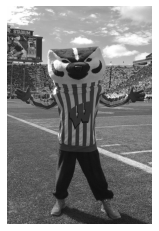

In [2]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

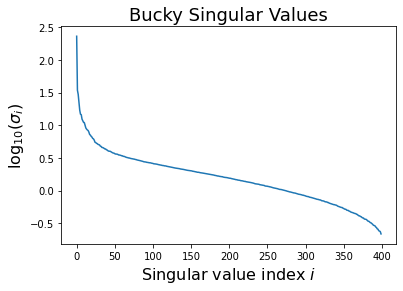

Rank A: 400
(400, 400)


In [3]:
# Bucky's singular values

U,s,VT = np.linalg.svd(A,full_matrices=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
# ax.plot(s) => we use log10 so that the graph is better scaled
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()
print("Rank A:" , np.linalg.matrix_rank(A)) # A is full rank 
print(np.shape(VT))

# Plotting the log of the singular values helps make the smaller ones distinct from the 
# zero on plot

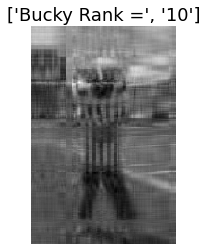

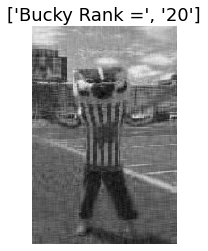

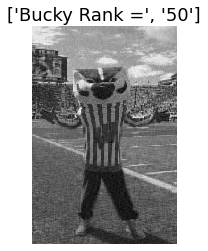

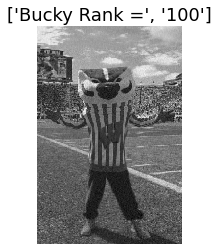

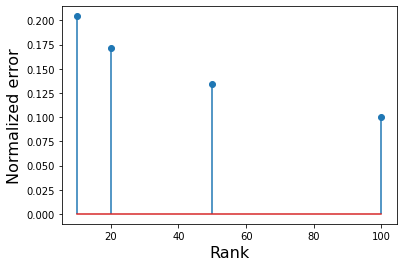

In [4]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i, r in enumerate(r_vals):
    
    aux = np.arange(r*r).reshape(r,r)
    S_matrix = np.zeros_like(aux) 
    np.fill_diagonal(S_matrix, s)
   
    # Ar = U[:,0:r]@S_matrix@VT[0:r]
    Ar = U[:,0:r]@np.diag(s[0:r])@VT[0:r,:]
    Er = A - Ar
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()
# as r increases we can see that the error decreases and the quality of the images increses
# the major features of the image are captured pretty weel by r=50

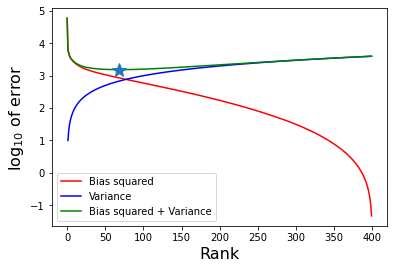

In [26]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 10
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

# The rank that optimizes the bias-variance tradeoff is approximately 69 (68-70)
# as shown in the plot

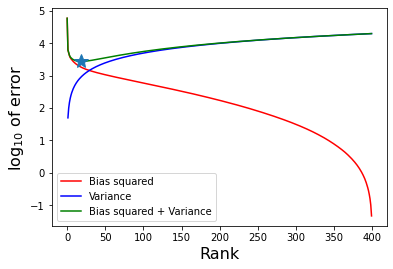

In [30]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 50
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

# The rank that optimized the bias-variance tradeoff is approximately 19 (18-20)
# as shown in the plot. The higher level of noise increases the contribution
# of variance, and thus results in a decrease in the rank of the optimum 
# bias-variance cost.

In [ ]:
# we can see that the optimum changes => if sigma is grater then the optimum has a lower rank and a higher log10 of error